<a href="https://colab.research.google.com/github/TimurMMD/AI_LSBF-UEL_project/blob/main/Image_CNN_resnet_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting the Google Drive with the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
# Import libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torchmetrics

In [5]:
# Define the path to the dataset
data_dir = '/content/drive/My Drive/AI&MV'

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a fixed size
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the training, validation, and testing datasets
train_dir = os.path.join(data_dir, 'seg_train/seg_train')
val_dir = os.path.join(data_dir, 'seg_test/seg_test')

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Check the number of images in the train and validation sets
print(f'Number of training images: {len(train_dataset)}')
print(f'Number of validation images: {len(val_dataset)}')

Number of training images: 14034
Number of validation images: 3000


In [6]:
image_0, label_0 = train_dataset[0]
label_0

0

In [7]:
image_0.shape

torch.Size([3, 128, 128])

In [19]:
class_name = train_dataset.classes

Image shape: torch.Size([3, 128, 128])


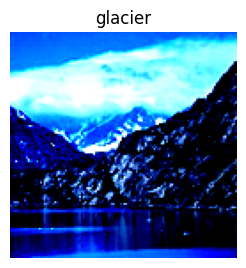

Image shape: torch.Size([3, 128, 128])


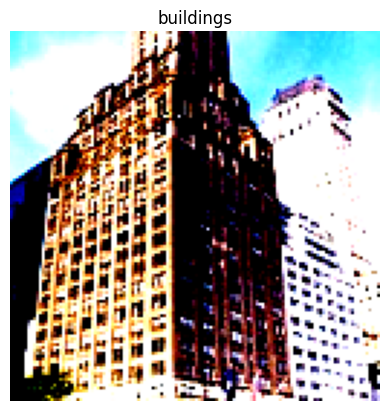

Image shape: torch.Size([3, 128, 128])


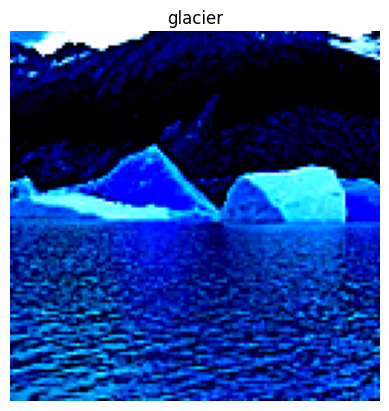

Image shape: torch.Size([3, 128, 128])


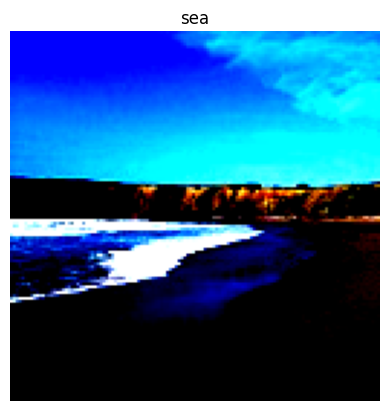

Image shape: torch.Size([3, 128, 128])


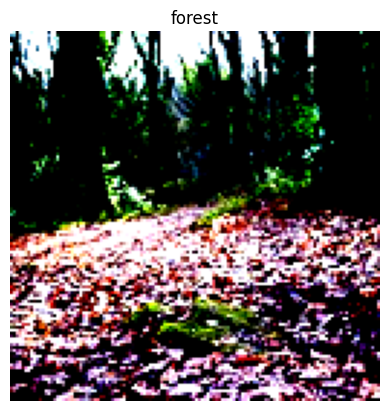

Image shape: torch.Size([3, 128, 128])


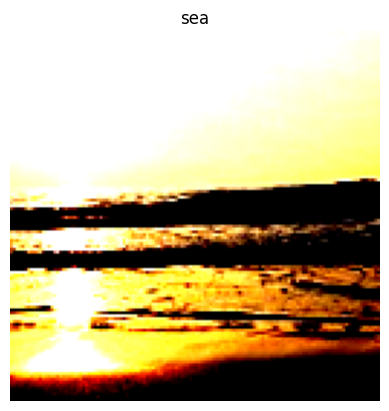

Image shape: torch.Size([3, 128, 128])


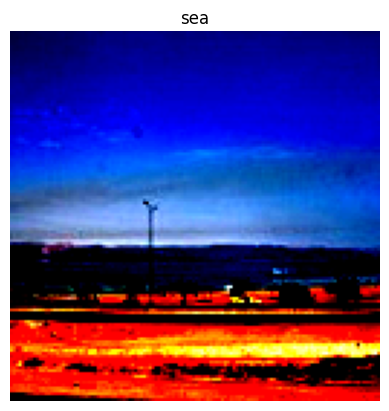

Image shape: torch.Size([3, 128, 128])


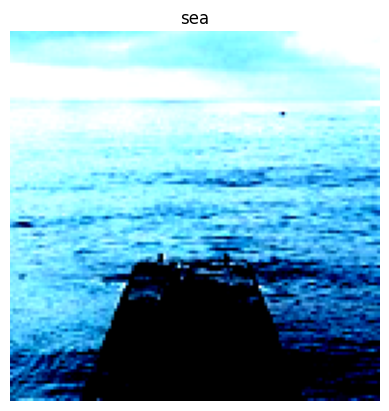

Image shape: torch.Size([3, 128, 128])


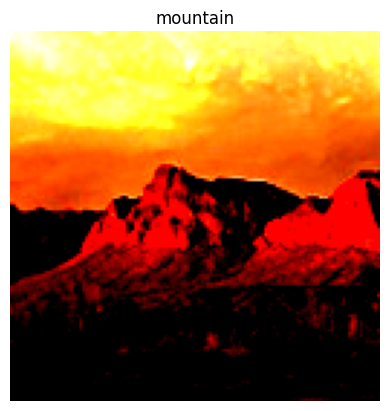

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=(1,)).item()
    image, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    print(f'Image shape: {image.shape}')
    image = image.permute(1, 2, 0)
    plt.imshow(image)
    plt.title(class_name[label])
    plt.axis(False)
    plt.show()

In [10]:
# Load a pretrained ResNet model
model = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes in the dataset
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 6)  # Intel Image Classification has 6 classes

# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 71.4MB/s]


In [11]:
!nvidia-smi

Mon Aug  5 04:14:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0              26W /  70W |    167MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [12]:
# Check that the model is using GPU
next(model.parameters()).device

device(type='cuda', index=0)

In [14]:
from tqdm.auto import tqdm
### Training loop
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in tqdm(range(num_epochs)):

    # Set the model to training mode and create the loss variable
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch, data in enumerate(train_loader, 0):
        # Get the inputs and labels and move them to cuda device
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics and record loss values
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()


    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}')




    ### Testing loop
    val_loss = 0.0
    correct = 0
    total = 0



    # Initialize confusion matrix
    confmat = torchmetrics.ConfusionMatrix(task='multiclass', num_classes=6)

    # Set the model to evaluation mode
    model.eval()

    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Update confusion matrix
            confmat.update(predicted.cpu(), labels.cpu())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}, Accuracy: {100 * correct / total:.2f}%')


    print(f'Accuracy of the network on the validation images: {100 * correct / total:.2f}%')


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Training Loss: 0.3298
Epoch [1/10], Validation Loss: 1.0931, Accuracy: 89.40%
Accuracy of the network on the validation images: 89.40%
Epoch [2/10], Training Loss: 0.2431
Epoch [2/10], Validation Loss: 0.0598, Accuracy: 89.80%
Accuracy of the network on the validation images: 89.80%
Epoch [3/10], Training Loss: 0.1965
Epoch [3/10], Validation Loss: 0.3396, Accuracy: 90.60%
Accuracy of the network on the validation images: 90.60%
Epoch [4/10], Training Loss: 0.1713
Epoch [4/10], Validation Loss: 0.1213, Accuracy: 90.87%
Accuracy of the network on the validation images: 90.87%
Epoch [5/10], Training Loss: 0.1719
Epoch [5/10], Validation Loss: 0.3047, Accuracy: 88.93%
Accuracy of the network on the validation images: 88.93%
Epoch [6/10], Training Loss: 0.1427
Epoch [6/10], Validation Loss: 0.0721, Accuracy: 89.73%
Accuracy of the network on the validation images: 89.73%
Epoch [7/10], Training Loss: 0.1346
Epoch [7/10], Validation Loss: 0.0566, Accuracy: 91.07%
Accuracy of th

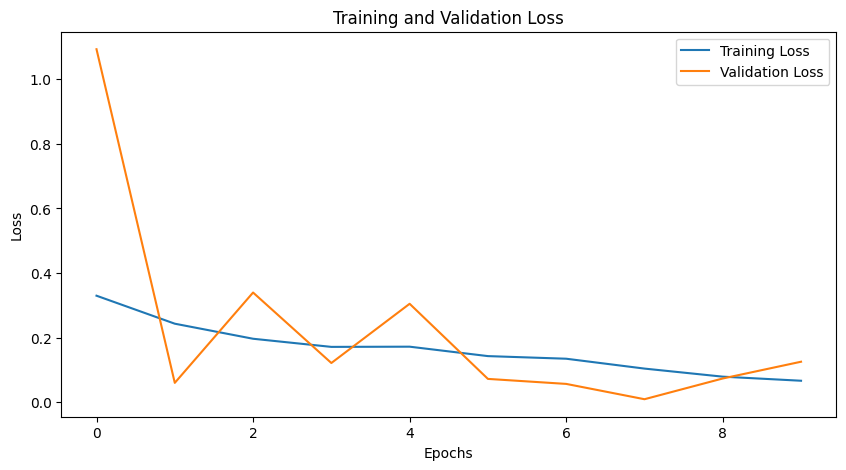

In [15]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

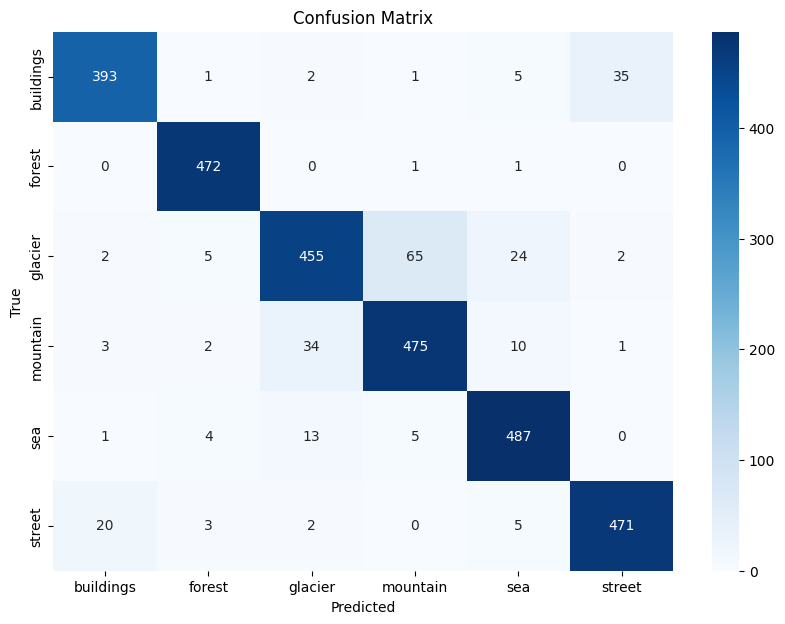

In [20]:
import seaborn as sns

# Compute the final confusion matrix
conf_matrix = confmat.compute().numpy()

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


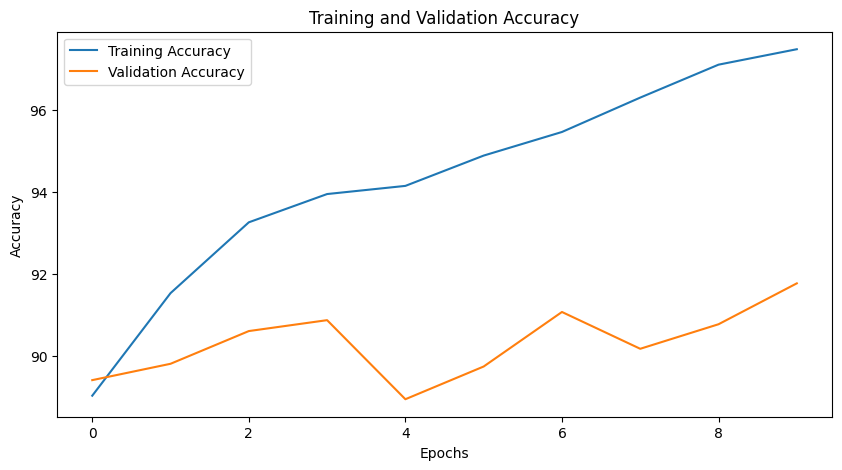

In [17]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()